# Weather Prediction

This project is to deal with a weather forecast problem. It is a binary classification problem to predict whether or not a location will get rain the next day.  We will use Kmeans, Hierarchical Agglomerative Clustering and Decision Trees.

Information about the dataset (Weather Forecast Training.csv):
- <b>Location:</b> The location name of the weather station
- <b>MinTemp:</b> The minimum temperature in degrees celsius
- <b>MaxTemp:</b> The maximum temperature in degrees celsius
- <b>Rainfall:</b> The amount of rainfall recorded for the day in mm
- <b>Evaporation:</b> The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- <b>Sunshine: </b>The number of hours of bright sunshine in the day.
- <b>WindGustDir:</b> The direction of the strongest wind gust in the 24 hours to midnight
- <b>WindGustSpeed:</b> The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- <b>WindDir:</b> Direction of the wind
- <b>WindSpeed:</b> Wind speed (km/hr) averaged over 10 minutes
- <b>Humidity:</b> Humidity (percent)
- <b>Pressure:</b> Atmospheric pressure (hpa) reduced to mean sea level
- <b>Cloud:</b> Fraction of sky obscured by cloud This is measured in “oktas”, which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- <b>Temp:</b> Temperature (degrees C)
- <b>RainTodayBoolean:</b> 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- <b>RainTomorrow:</b> The target variable. Did it rain tomorrow?

## Import libraries

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
import missingno as msno
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics


## Import the data

In [3]:
# import the csv file into the jupyter notebook by using pandas and show the dataframe.
training = pd.read_csv('Weather Forecast Training.csv')
training.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


## Section 1: Data preparation

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 16 columns):
Location         51978 non-null object
MinTemp          51694 non-null float64
MaxTemp          51849 non-null float64
Rainfall         51231 non-null float64
Evaporation      29425 non-null float64
Sunshine         27103 non-null float64
WindGustDir      48380 non-null object
WindGustSpeed    48407 non-null float64
WindDir          50465 non-null object
WindSpeed        50954 non-null float64
Humidity         50549 non-null float64
Pressure         46912 non-null float64
Cloud            31848 non-null float64
Temp             50915 non-null float64
RainToday        51231 non-null object
RainTomorrow     51978 non-null object
dtypes: float64(11), object(5)
memory usage: 6.3+ MB


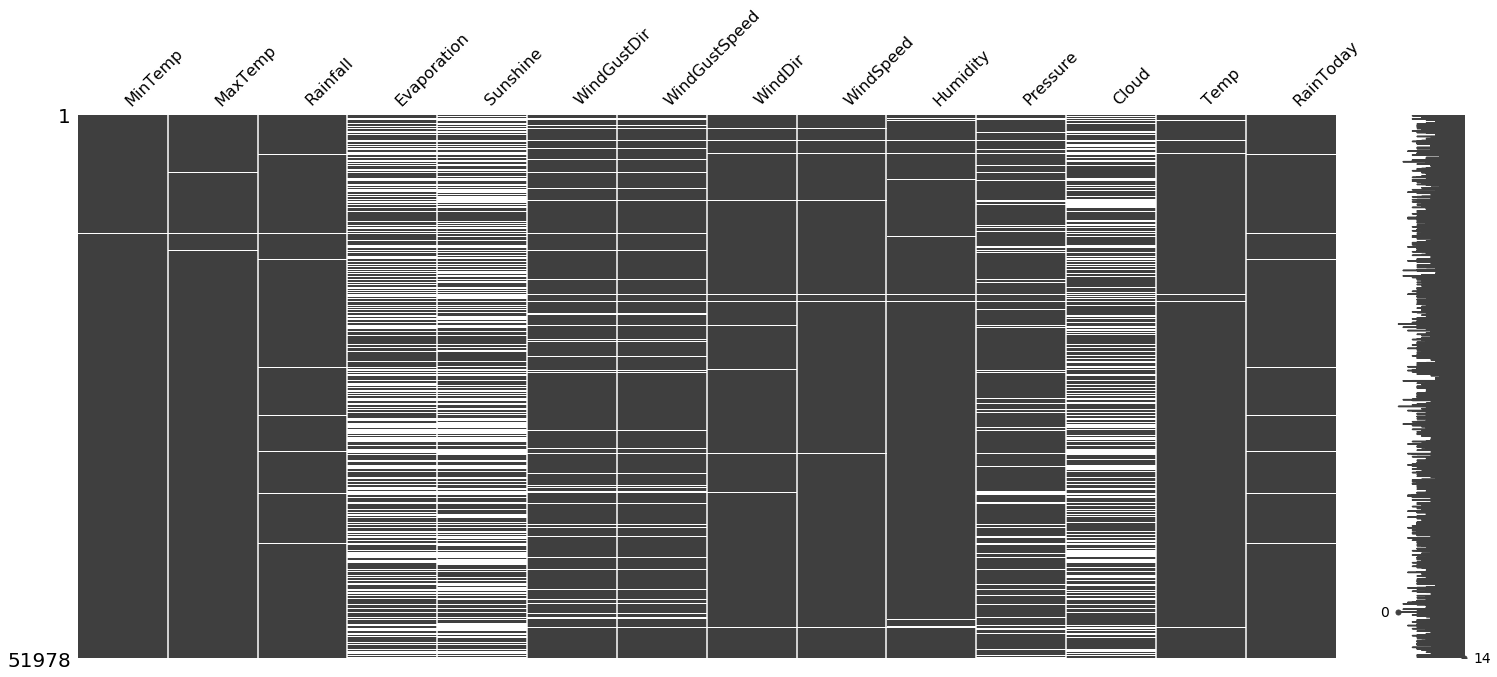

In [5]:
# visualize the missing data
missingdata_df = training.columns[training.isnull().any()].tolist()
msno.matrix(training[missingdata_df]);

Text(0.5, 1.0, 'Percentage missing data')

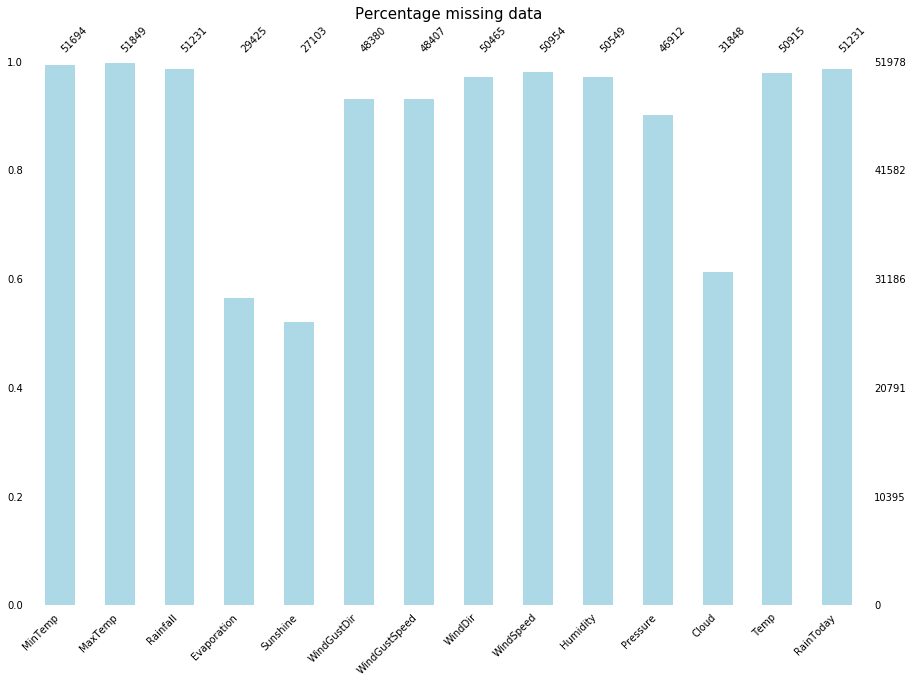

In [6]:
msno.bar(training[missingdata_df], log=False, figsize=(15,10), fontsize=10, color='lightblue')
plt.title("Percentage missing data", fontdict={'size':15})

In [7]:
training.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,51694.000000,51849.000000,51231.000000,29425.000000,27103.000000,48407.000000,50954.000000,50549.000000,46912.000000,31848.000000,50915.000000
mean,12.549174,22.512698,3.639494,5.177570,6.530580,42.003016,19.092299,57.432214,1014.273338,5.175647,20.845623
std,6.376746,7.113064,11.009628,4.017662,3.946561,14.627024,9.157505,21.833045,7.278733,2.632166,6.938471
min,-8.000000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-4.400000
25%,7.900000,17.200000,0.000000,2.400000,3.200000,31.000000,13.000000,42.000000,1009.300000,3.000000,15.700000
50%,12.300000,21.800000,0.000000,4.400000,6.900000,39.000000,19.000000,58.000000,1014.200000,6.000000,20.200000
75%,17.200000,27.500000,2.200000,7.000000,9.900000,50.000000,24.000000,73.000000,1019.200000,7.000000,25.600000
max,31.400000,47.000000,371.000000,77.300000,14.500000,135.000000,83.000000,100.000000,1037.800000,8.000000,46.100000


<b>Problems of original data</b>

  - In some columns, such as Evaporation, Sunshine, Cloud, there are too many missing values, so we can not simply fill them with mean or median.
  - The difference in scale for most of our attributes. Having 16 dimensions that contain different units of measurement(mm Rainfall, km/hr Wind, hpa Pressure etc..) can have devastating affects on how our distance-based functions operate.
  - This dataset contains both numerical and categorical data

### Cleaning the missing data - MICE

<b>Introduction to MICE

MICE, or Multivariate Imputation by Chained Equation (what a memorable term), is an imputation method which works by filling the missing data multiple times. Chained Equation approach also has the benefit of being able to handle different data types efficiently — such as continuous and binary.

The basic idea is to treat each variable with missing values as the dependent variable in a regression, with some or all of the remaining variables as its predictors. The MICE procedure cycles through these models, fitting each in turn, then uses a procedure called “predictive mean matching” (PMM) to generate random draws from the predictive distributions determined by the fitted models. These random draws become the imputed values for one imputed data set.

One of the advantages of this model is that the missing values are imputed based on the observed values for a given individual and the relations observed in the data for other participants, assuming the observed variables are included in the imputation model.

In [8]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [9]:
misscol_num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed', 'Humidity',
               'Pressure', 'Cloud', 'Temp']
from fancyimpute import IterativeImputer as MICE
training[misscol_num] = MICE().fit_transform(training[misscol_num])
training

/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,6.441944,7.106195,SSE,41.000000,SSE,28.0,55.0,1026.0,4.498027,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.800000,8.300000,W,39.000000,WSW,26.0,48.0,1014.4,7.000000,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,2.759809,1.067994,SE,44.000000,SW,9.0,99.0,1028.5,7.744250,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,1.116678,7.456807,WSW,35.000000,WNW,19.0,55.0,1023.0,4.000000,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,4.886490,7.854859,NNE,41.000000,ESE,7.0,40.0,1027.1,3.803472,22.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51973,CoffsHarbour,20.1,25.8,5.6,4.400000,8.200000,ESE,28.000000,SE,13.0,72.0,1018.9,3.000000,24.7,Yes,Yes
51974,Sydney,14.2,18.6,2.8,4.000000,0.000000,SSE,41.000000,SE,20.0,52.0,1022.3,8.070519,17.2,Yes,Yes
51975,BadgerysCreek,11.1,17.2,1.2,2.535145,2.436754,W,31.000000,W,11.0,92.0,1018.7,7.549848,12.9,Yes,Yes
51976,Sydney,19.0,24.8,0.0,5.200000,7.500000,NaN,36.985211,E,17.0,65.0,1015.4,7.000000,23.4,No,No


In [10]:
training.isnull().sum(axis=0)

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      3598
WindGustSpeed       0
WindDir          1513
WindSpeed           0
Humidity            0
Pressure            0
Cloud               0
Temp                0
RainToday         747
RainTomorrow        0
dtype: int64

In [11]:
# Count the distribution of categorical variables
print(training['WindGustDir'].value_counts())
print(training['WindDir'].value_counts())
print(training['RainToday'].value_counts())

W      3810
N      3458
WSW    3315
S      3269
SE     3206
WNW    3197
SW     3175
NW     3161
SSE    3134
SSW    3119
E      2980
ENE    2693
NNW    2605
ESE    2479
NNE    2392
NE     2387
Name: WindGustDir, dtype: int64
W      3747
SE     3687
S      3469
WSW    3455
WNW    3434
N      3388
NW     3356
SW     3273
SSE    3223
NNW    3001
SSW    2939
NE     2828
ESE    2815
E      2805
ENE    2645
NNE    2400
Name: WindDir, dtype: int64
No     35544
Yes    15687
Name: RainToday, dtype: int64


In [12]:
# fill the missing categorical variables with the most common items
training['WindGustDir'].fillna('W',inplace = True)
training['WindDir'].fillna('W',inplace = True)
training['RainToday'].fillna('No',inplace = True)
training.isnull().sum(axis=0)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir          0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
RainToday        0
RainTomorrow     0
dtype: int64

### Boolean data
For RainToday and RainTomorrow:
 - If Rain = Yes, then transfer it to 1
 - If Rain = No, then transfer it to 0

In [13]:
# RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
variable_name = {'Yes' : 1 , 'No' : 0 }
training['RainToday'] = training['RainToday'].map(variable_name)
training['RainTomorrow'] = training['RainTomorrow'].map(variable_name)
training.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,6.441944,7.106195,SSE,41.0,SSE,28.0,55.0,1026.0,4.498027,22.4,0,1
1,Nuriootpa,11.1,20.8,0.0,4.800000,8.300000,W,39.0,WSW,26.0,48.0,1014.4,7.000000,19.5,0,0
2,GoldCoast,15.9,19.5,17.6,2.759809,1.067994,SE,44.0,SW,9.0,99.0,1028.5,7.744250,17.8,1,1
3,Bendigo,0.0,14.9,0.0,1.116678,7.456807,WSW,35.0,WNW,19.0,55.0,1023.0,4.000000,14.2,0,1
4,Walpole,9.1,22.7,0.0,4.886490,7.854859,NNE,41.0,ESE,7.0,40.0,1027.1,3.803472,22.5,0,0


### Check the statistic information

In [14]:
training.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
count,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000
mean,12.550616,22.512499,3.642886,4.812979,6.345565,41.845185,19.100439,57.477222,1014.384405,5.146798,20.864989,0.301801,0.490958
std,6.373137,7.108734,10.938651,3.508513,3.612935,14.457764,9.080414,21.723718,7.024392,2.324829,6.981754,0.459044,0.499923
min,-8.000000,-4.100000,-5.484594,-4.238013,-5.875777,7.000000,0.000000,1.000000,977.100000,0.000000,-4.603139,0.000000,0.000000
25%,8.000000,17.200000,0.000000,2.517355,3.500000,31.000000,13.000000,42.000000,1009.800000,3.395933,15.700000,0.000000,0.000000
50%,12.300000,21.800000,0.000000,4.356673,6.396056,39.376940,19.000000,58.000000,1014.473027,5.564767,20.200000,0.000000,0.000000
75%,17.200000,27.500000,2.400000,6.483674,9.200000,50.000000,24.000000,73.000000,1019.000000,7.000000,25.600000,1.000000,1.000000
max,31.400000,47.000000,371.000000,77.300000,16.011727,135.000000,83.000000,124.315971,1037.800000,11.068099,46.100000,1.000000,1.000000


### Label Encoder - Dealing with the categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

catcol = ['Location', 'WindGustDir', 'WindDir']
# Assigning numerical values and storing in another column
for i in catcol:
    training[i+'_Types'] = labelencoder.fit_transform(training[i])
training


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow,Location_Types,WindGustDir_Types,WindDir_Types
0,NorahHead,18.9,23.7,0.0,6.441944,7.106195,SSE,41.000000,SSE,28.0,55.0,1026.0,4.498027,22.4,0,1,26,10,10
1,Nuriootpa,11.1,20.8,0.0,4.800000,8.300000,W,39.000000,WSW,26.0,48.0,1014.4,7.000000,19.5,0,0,28,13,15
2,GoldCoast,15.9,19.5,17.6,2.759809,1.067994,SE,44.000000,SW,9.0,99.0,1028.5,7.744250,17.8,1,1,14,9,12
3,Bendigo,0.0,14.9,0.0,1.116678,7.456807,WSW,35.000000,WNW,19.0,55.0,1023.0,4.000000,14.2,0,1,6,15,14
4,Walpole,9.1,22.7,0.0,4.886490,7.854859,NNE,41.000000,ESE,7.0,40.0,1027.1,3.803472,22.5,0,0,43,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51973,CoffsHarbour,20.1,25.8,5.6,4.400000,8.200000,ESE,28.000000,SE,13.0,72.0,1018.9,3.000000,24.7,1,1,11,2,9
51974,Sydney,14.2,18.6,2.8,4.000000,0.000000,SSE,41.000000,SE,20.0,52.0,1022.3,8.070519,17.2,1,1,37,10,9
51975,BadgerysCreek,11.1,17.2,1.2,2.535145,2.436754,W,31.000000,W,11.0,92.0,1018.7,7.549848,12.9,1,1,4,13,13
51976,Sydney,19.0,24.8,0.0,5.200000,7.500000,W,36.985211,E,17.0,65.0,1015.4,7.000000,23.4,0,0,37,13,0


In [16]:
training = training.drop(['Location', 'WindGustDir', 'WindDir'], axis = 1)

### Deal with the outliers
In this part, I change the outliers with NaN, then use MICE package to deal with outliers like missing value. Since this package will not make big changes on the statistic summary.

In [17]:
for i in training.columns:
    training[i] = np.where(training[i]>np.quantile(training[i], 0.95), np.nan, training[i])
    training[i] = np.where(training[i]<np.quantile(training[i], 0.05), np.nan, training[i])
training.isna().sum() 

MinTemp              2481
MaxTemp              2586
Rainfall             2591
Evaporation          2454
Sunshine             2599
WindGustSpeed        2488
WindSpeed            2203
Humidity             2352
Pressure             2573
Cloud                1132
Temp                 2573
RainToday               0
RainTomorrow            0
Location_Types       1983
WindGustDir_Types       0
WindDir_Types           0
dtype: int64

In [18]:
misscol = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed', 'Humidity',
           'Pressure', 'Cloud', 'Temp', 'Location_Types']
training[misscol] = MICE().fit_transform(training[misscol])
training.isna().sum() 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustSpeed        0
WindSpeed            0
Humidity             0
Pressure             0
Cloud                0
Temp                 0
RainToday            0
RainTomorrow         0
Location_Types       0
WindGustDir_Types    0
WindDir_Types        0
dtype: int64

In [19]:
training.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow,Location_Types,WindGustDir_Types,WindDir_Types
count,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000
mean,12.334348,22.164599,1.846084,4.496603,6.274313,40.580253,18.399637,56.900252,1013.827962,5.147257,20.548167,0.301801,0.490958,22.729961,8.211782,8.009158
std,6.088916,6.519982,3.549913,2.605783,3.512907,12.122816,7.800834,20.884935,6.266857,2.325825,6.431901,0.459044,0.499923,13.371397,4.655805,4.594460
min,-8.000000,-4.100000,-5.484594,-4.238013,-5.875777,7.000000,0.000000,1.000000,977.100000,0.000000,-4.603139,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,17.200000,0.000000,2.514855,3.500000,31.000000,13.000000,42.000000,1009.800000,3.395933,15.700000,0.000000,0.000000,11.000000,4.000000,4.000000
50%,12.200000,21.800000,0.000000,4.325203,6.385929,39.000000,19.000000,58.000000,1014.322038,5.564569,20.200000,0.000000,0.000000,23.000000,9.000000,8.000000
75%,17.000000,27.300000,2.200000,6.400000,9.179572,50.000000,24.000000,73.000000,1018.400000,7.000000,25.400000,1.000000,1.000000,34.000000,13.000000,12.000000
max,29.093825,36.720228,18.800000,11.868736,15.712704,83.295805,36.117556,112.764726,1026.000000,11.765122,36.012823,1.000000,1.000000,46.000000,15.000000,15.000000


### Check the distribution of all the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe253a41f90>,
      dtype=object)

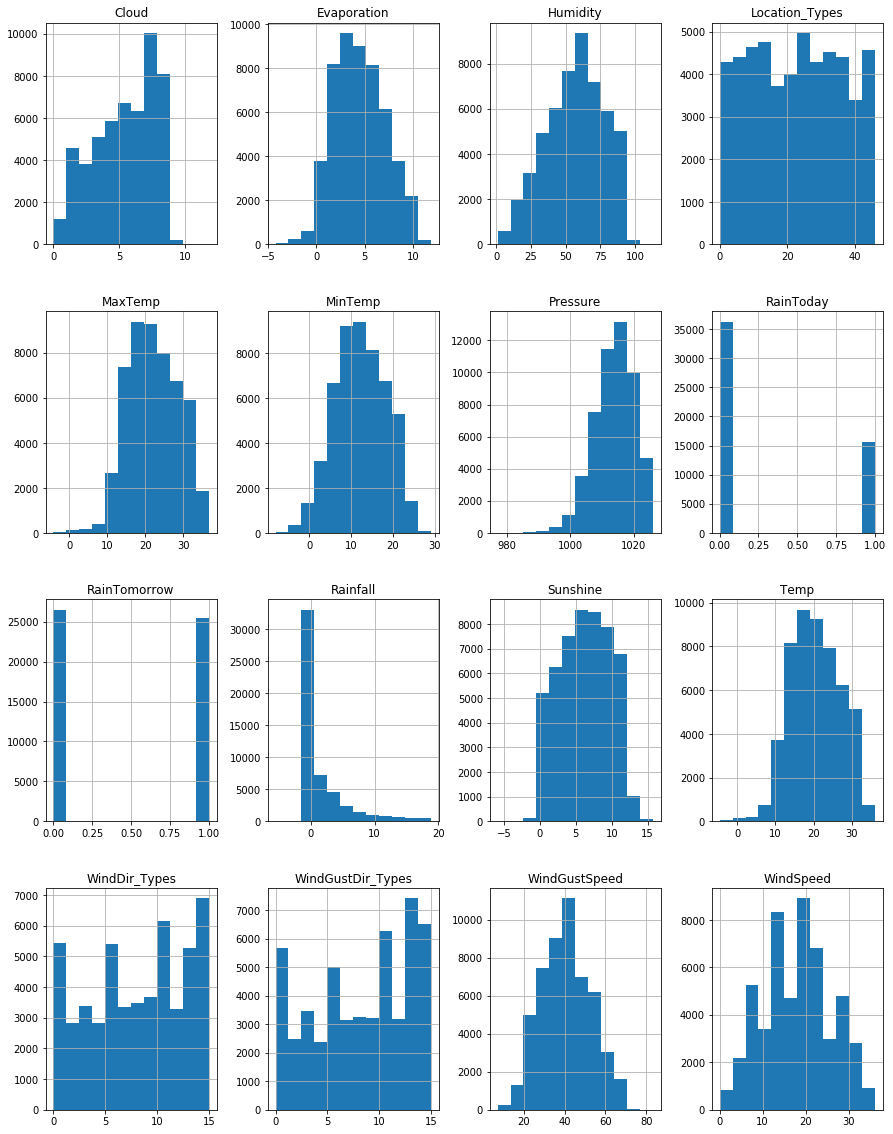

In [20]:
training.hist(bins=12, figsize=(15, 20))

**Interpretation**
*   Rainfall is extremely right-skewed, which means most of days, there is 0-20 millimeters of rain.
*   Evaporation is also very right-skewed that evaporation happens almost every day about 0-10.
*   The range of Pressure is 970-1040. This will reduce the scale along the x-axis in a way that is much more digestable while using k-nearest neighbors to impute missing values into our model.
*   Using standard scalar to normalize the data.



### Scaling the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe253f0e110>,
      dtype=object)

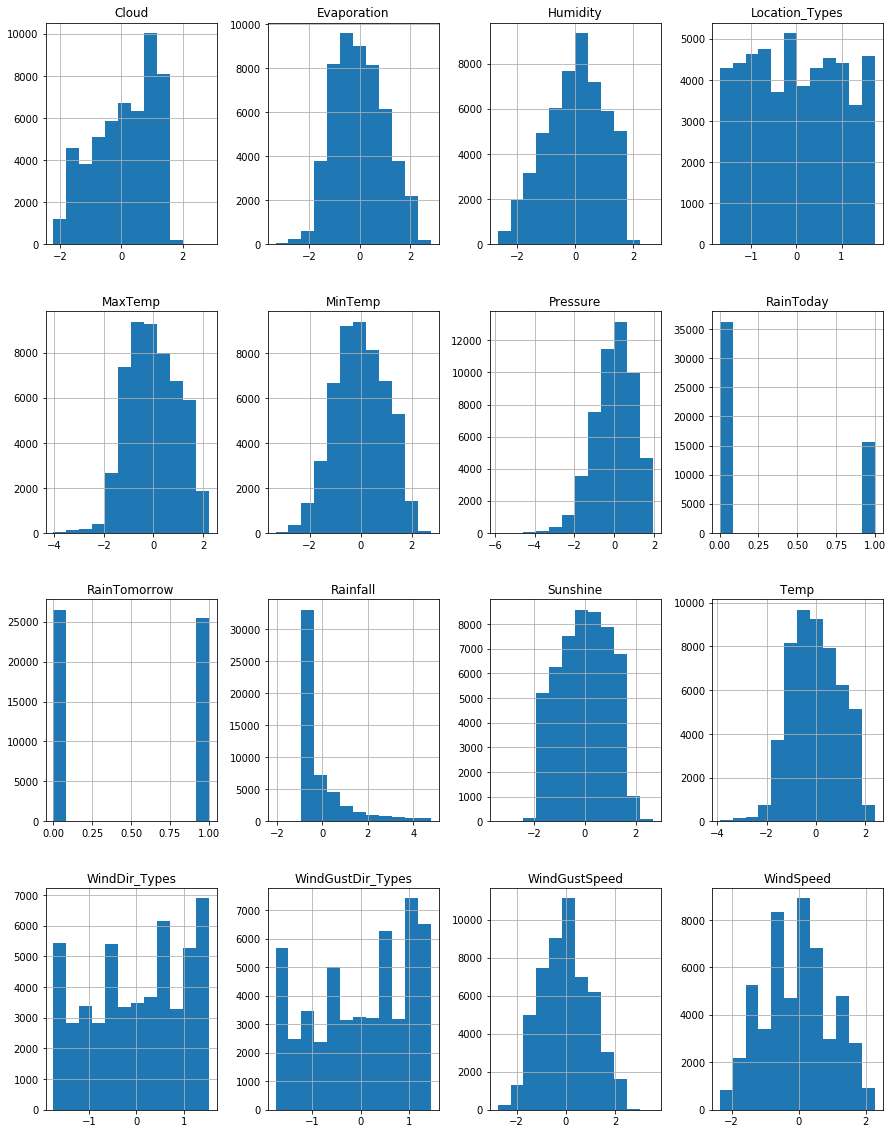

In [21]:
numcol = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed', 'Humidity', 
          'Pressure', 'Cloud', 'Temp', 'Location_Types', 'WindGustDir_Types', 'WindDir_Types']

from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
training[numcol] = feature_scaler.fit_transform(training[numcol])
training.hist(bins=12, figsize=(15, 20))

In [22]:
training.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow,Location_Types,WindGustDir_Types,WindDir_Types
count,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,5.197800e+04,51978.000000,51978.000000,5.197800e+04,5.197800e+04,5.197800e+04
mean,-2.977511e-18,-6.608879e-16,2.183780e-15,2.706171e-16,8.970554e-17,7.647334e-17,4.803918e-16,4.627403e-16,-5.948991e-15,9.461822e-17,-4.319741e-16,0.301801,0.490958,-7.066357e-17,1.565389e-15,-3.592921e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.459044,0.499923,1.000010e+00,1.000010e+00,1.000010e+00
min,-3.339600e+00,-4.028362e+00,-2.065050e+00,-3.352045e+00,-3.458733e+00,-2.770031e+00,-2.358698e+00,-2.676608e+00,-5.860723e+00,-2.213110e+00,-3.910438e+00,0.000000,0.000000,-1.699911e+00,-1.763790e+00,-1.743238e+00
25%,-7.118492e-01,-7.614509e-01,-5.200413e-01,-7.605266e-01,-7.897560e-01,-7.902739e-01,-6.921939e-01,-7.134519e-01,-6.427466e-01,-7.529979e-01,-7.537762e-01,0.000000,0.000000,-8.772512e-01,-9.046388e-01,-8.726154e-01
50%,-2.206464e-02,-5.592074e-02,-5.200413e-01,-6.577758e-02,3.177354e-02,-1.303549e-01,7.696208e-02,5.265798e-02,7.884021e-02,1.794271e-01,-5.413186e-02,0.000000,0.000000,2.019550e-02,1.692995e-01,-1.993229e-03
75%,7.662606e-01,7.876480e-01,9.969816e-02,7.304582e-01,8.270321e-01,7.770338e-01,7.179254e-01,7.708860e-01,7.295654e-01,7.966036e-01,7.543461e-01,1.000000,1.000000,8.428549e-01,1.028450e+00,8.686289e-01
max,2.752483e+00,2.232486e+00,4.775914e+00,2.829171e+00,2.686801e+00,3.523601e+00,2.271307e+00,2.674895e+00,1.942306e+00,2.845411e+00,2.404391e+00,1.000000,1.000000,1.740302e+00,1.458026e+00,1.521596e+00


### Visualize the Data

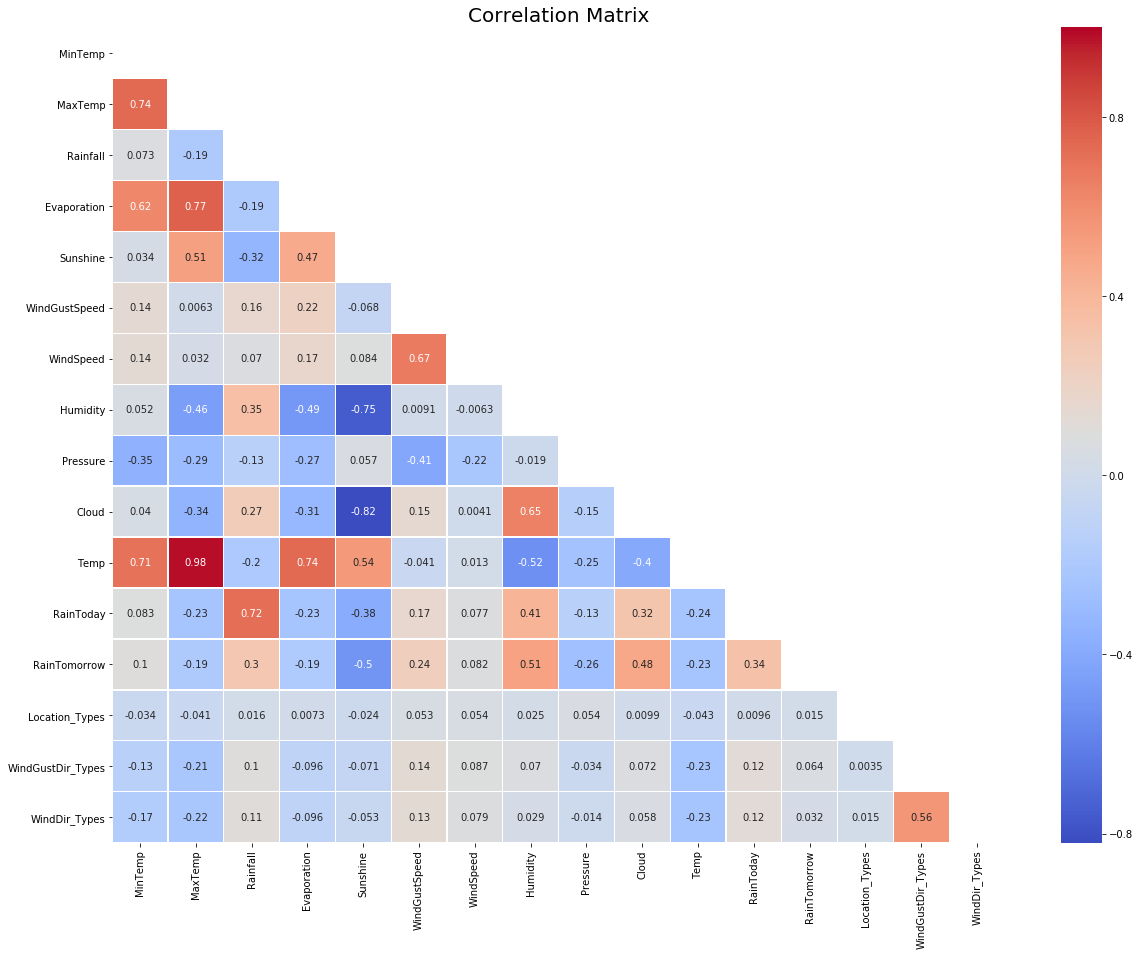

In [23]:
plt.figure(figsize = (http://localhost:8888/notebooks/IST707/HW2/Jenny_Cao_HW2.ipynb#Visualize-the-Data20,15))
Matrix = np.triu(training.corr())
ax = sns.heatmap(training.corr(),  annot = True, fmt='.2g', mask=Matrix, cmap= 'coolwarm', linewidths=.2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix',y=-0.1, fontsize=20);

- <b>Interpretation</b>

- For the three categorical features: Location_Types, WindGustDir_Types, WindDir_Types, the correlation between RainTomorrow is 0.015, 0.064, 0.032. It seems there is not too much relation with our target. So we will not consider these three columns when we do the analysis later.
- The correlation between MinTemp and RainTomorrow is 0.1 and 0,082, we will not consider it.




## Section 2: Build, tune and evaluate cluster analysis and decision tree models

### Kmeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.



In [24]:
training0 = training[['Cloud', 'Evaporation', 'Humidity', 'MaxTemp', 'Pressure','RainToday', 
          'Rainfall', 'Sunshine', 'Temp', 'WindGustSpeed',  'RainTomorrow']]
X = training0.iloc[:, 0:10].values
y = training0.iloc[:, 10].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- <b>Default kmeans

In [26]:
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=42)
kmeans.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [27]:
kmeans.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

In [28]:
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

- <b>Elbow Method

In [29]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(training0)
    kmeanModel.fit(training0)
    distortions.append(kmeanModel.inertia_)

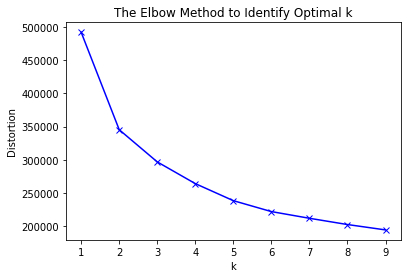

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

<b> Interpretation</b>

   1. Elbow method is to run k-means clustering on the dataset for a range of values of k , and for each value of k calculate the sum of squared errors (SSE).
   2. Once the distortion starts decreasing in a linear fashion we would like to conclude the optimal number of clusters, k.
   3. This elbow curve demonstrates that the optimal number of cluster for this algorithm being = 2

- <b>Grid Search to find the optimal parameters

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'init':['k-means++', 'random'],
              'precompute_distances':['auto', True, False],
              'algorithm':['auto','full','elkan'],
              'max_iter':[100,300]}

Grid1 = GridSearchCV(kmeans,param_grid)

In [32]:
gd_sr = GridSearchCV(estimator=kmeans,
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

In [33]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=100, n_clusters=2, n_init=25,
                              n_jobs=None, precompute_distances='auto',
                              random_state=42, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 300],
                         'precompute_distances': ['auto', True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
#  check the parameters that return the highest accuracy
best_parameters = gd_sr.best_params_
print(best_parameters)

{'algorithm': 'auto', 'init': 'random', 'max_iter': 100, 'precompute_distances': 'auto'}


- <b>Fit the optimal k we found into kmeans model</b>
    
    1. algorithm = 'auto', this is automatically set to elkan given that our data is densely clustered together, if our data was organized sparsely than the full algorithm would be called
    2. precompute_distances = 'auto' means that we simply are not precomputing distances too much RAM is required.

In [35]:
kmeans = KMeans(n_clusters=2, init='random', n_init=25, max_iter=100, 
                precompute_distances='auto', random_state=42, copy_x=True, algorithm='auto')
kmeans.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=2,
       n_init=25, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

- <b>Predict the model

In [36]:
y_pred = kmeans.predict(X_test)

In [37]:
from sklearn import metrics
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy: 68.91%


In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68      8030
         1.0       0.66      0.73      0.70      7564

    accuracy                           0.69     15594
   macro avg       0.69      0.69      0.69     15594
weighted avg       0.69      0.69      0.69     15594



<b>Interpretation</b>
   1. The kmeans has a recall of 73% and an accuracy of 69%. n was set to 2 (binary classification) and n_init is the number of times the cluster actually runs the seed.
   2. Recall was optimized in this model which is good given that we want to minimize the possibility of False Negatives being thrown. This does however, compromise our precision at 66% for true cases.
   3. The f1 score represents the harmonic mean between precision and recall which shows the overall stability of the 

### HAC: Hierarchical Architecture Clustering

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this report we will focus on agglomerative clustering that involves the bottom-up approach.

In [39]:
training1 = training[['Cloud', 'Evaporation', 'Humidity', 'MaxTemp', 'Pressure','RainToday', 
          'Rainfall', 'Sunshine', 'Temp', 'WindGustSpeed', 'RainTomorrow']]
target = training['RainTomorrow']
training1.drop(['RainTomorrow'],axis=1, inplace = True)

training1.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cloud,Evaporation,Humidity,MaxTemp,Pressure,RainToday,Rainfall,Sunshine,Temp,WindGustSpeed
0,-0.279142,0.746555,-0.090988,0.235494,1.942306,0.0,-0.520041,0.236810,0.287916,0.034625
1,0.796604,0.116433,-0.426161,-0.209297,0.091281,0.0,-0.520041,0.576647,-0.162965,-0.130355
2,1.116601,-0.666522,1.356771,-0.408686,-0.710649,1.0,4.437875,-1.482068,-0.427276,0.282095
3,-0.493274,-1.297099,-0.090988,-1.114216,1.463593,0.0,-0.520041,0.336617,-0.986991,-0.460314
4,-0.577773,0.149625,-0.809216,0.082118,0.132426,0.0,-0.520041,0.449930,0.303464,0.034625


<b>NOTE:</b>  The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hac = cluster.fit(training1)

In [41]:
import sklearn.metrics as sm
#accuracy of the model
print("Accuracy Score: ", 1-sm.accuracy_score(target,(cluster.labels_)))
print("Precision Score: ", 1-sm.precision_score(target,(cluster.labels_)))
print("Recall Score: ", 1-sm.recall_score(target,(cluster.labels_)))

Accuracy Score:  0.6371734195236447
Precision Score:  0.689431704885344
Recall Score:  0.7558681766526901


In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
hc = linkage(training1,"ward")

- <b>Create Dendrogram</b>

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 2 clusters as shown in the following figure:

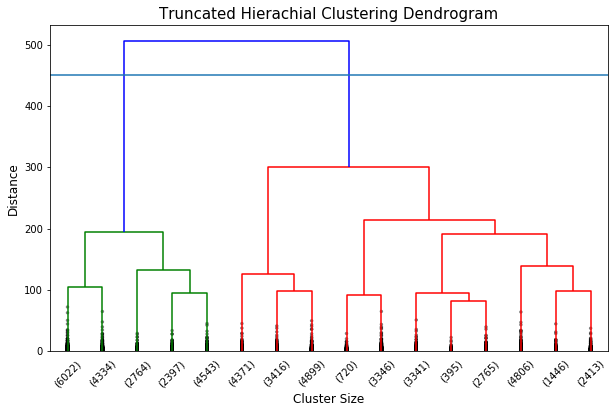

In [43]:
#Plotting the dendrogram
plt.figure(figsize=(10,6))
dendrogram(hc,truncate_mode= "lastp", p = 16, leaf_rotation=45,leaf_font_size=10, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram", fontdict={'size':15})
plt.xlabel("Cluster Size",fontdict={'size':12})
plt.ylabel("Distance",fontdict={'size':12})
#divide the cluster
plt.axhline(y=450)
#plt.axhline(350)
#plt.axhline(200)
plt.show(125)

### Decision Tree

In [44]:
training2 = training[['Cloud', 'Evaporation', 'Humidity', 'MaxTemp', 'Pressure','RainToday', 
          'Rainfall', 'Sunshine', 'Temp', 'WindGustSpeed', 'RainTomorrow']]
X = training2.iloc[:, 0:10].values
y = training2.iloc[:, 10].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"train data size is {X_train.shape}")

train data size is (36384, 10)


In [46]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
y_pred = clf.predict(X_test)
clf.tree_.max_depth

37

- <b>Model Hyperparameter Fine Tuning

Defining some of the attributes like max_depth, max_leaf_nodes, and min_samples_leaf can help prevent overfitting the model to the training data.

In [49]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                 

In [50]:
print('The score of the grid is:',grid.best_score_)

The score of the grid is: 0.7590149516270889


In [51]:
for hps, values in grid.best_params_.items():
    print(f"{hps}: {values}")

criterion: gini
max_depth: 5
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 2


In [52]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini',
                             max_depth=5, max_leaf_nodes=20,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             random_state=None, splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100)}%")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred)*100)}%")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred)*100)}%")


Accuracy: 76%
Precision: 77%
Recall: 73%


In [54]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      7900
         1.0       0.77      0.73      0.75      7694

    accuracy                           0.76     15594
   macro avg       0.76      0.76      0.76     15594
weighted avg       0.76      0.76      0.76     15594



In [55]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion.columns.name = "Pred"
df_confusion

Pred,0.0,1.0
row_0,,
0.0,6257,1643
1.0,2091,5603


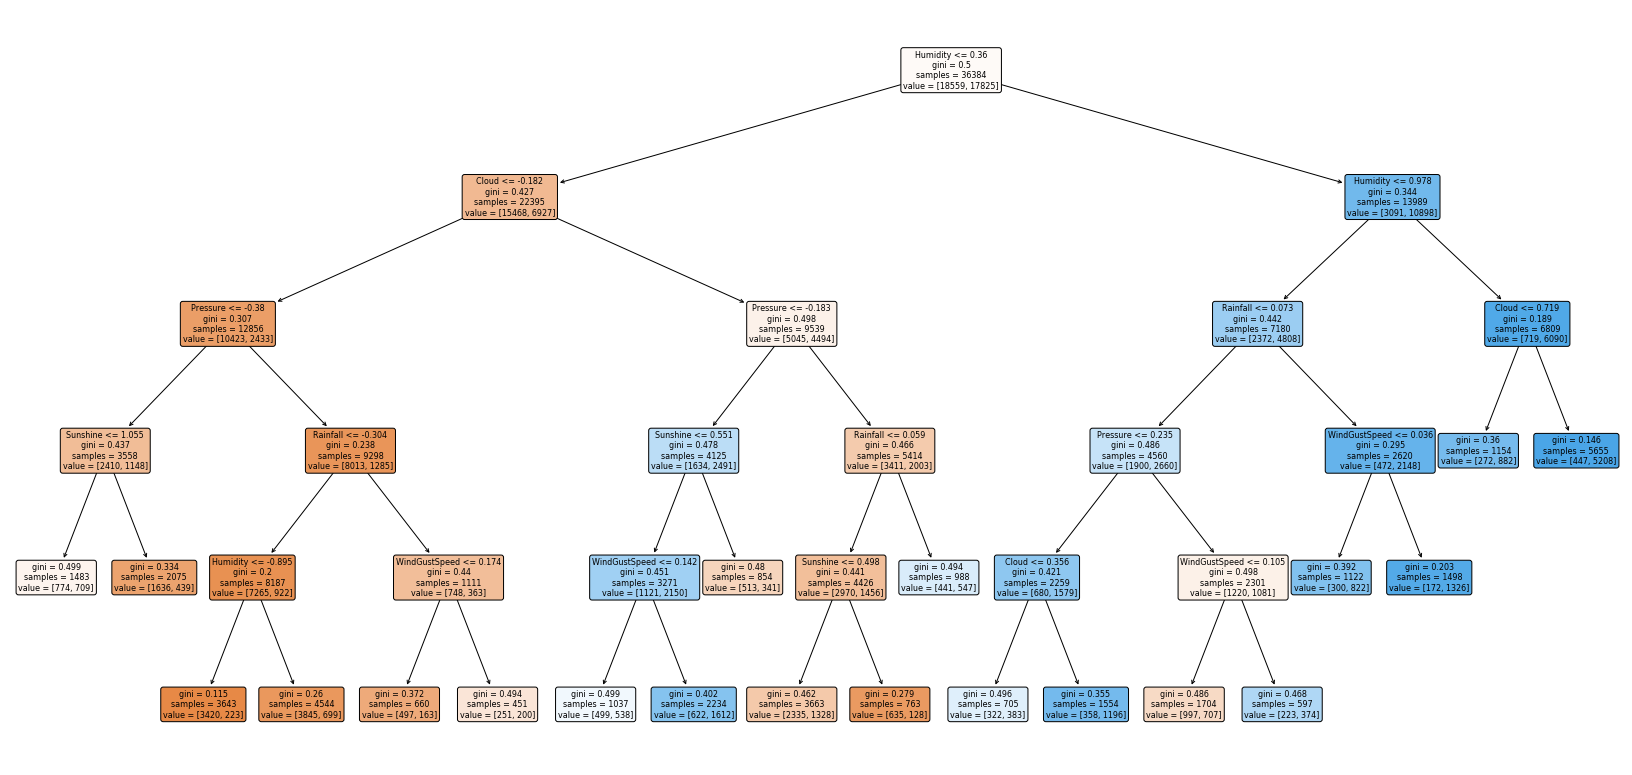

In [56]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
fig = plt.figure(figsize=(29,14))
_ = tree.plot_tree(clf, filled=True, rounded=True, feature_names=training2.columns, fontsize=8)

#### ROC Curve
AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets. AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.

The area covered by the curve is the area between the straight line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test data.
probs = clf.predict_proba(X_test)

#Keep Probabilities of the positive class only
probs = probs[:, 1]

# Compute the AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.84


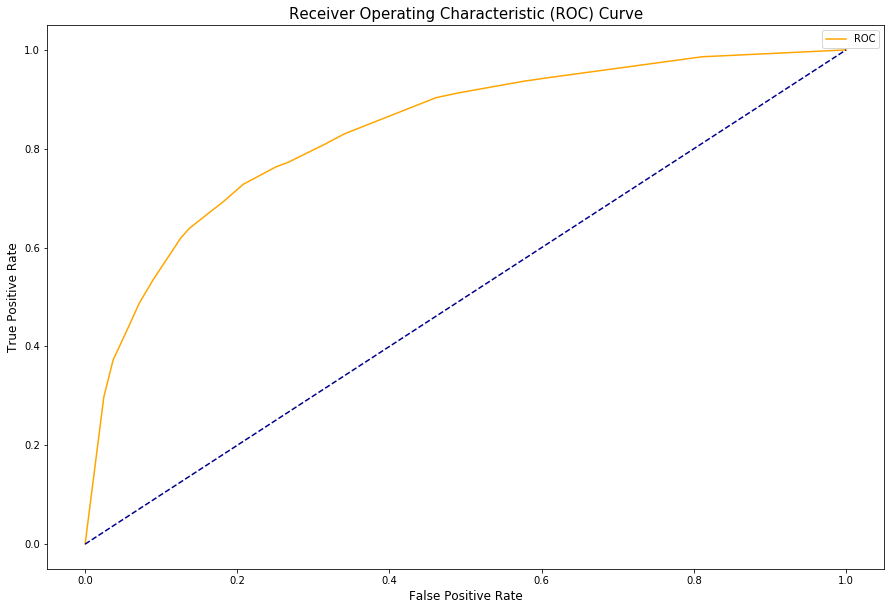

In [58]:
#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# define the roc curve function
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(15,10))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate',fontdict={'size':12})
    plt.ylabel('True Positive Rate', fontdict={'size':12})
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
    plt.legend()
    plt.show()

# Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)
